# Data Mining Challenge 2020-2021

## Team
* Francesco Fulco Gonzales 10614882
* Francesco Govigli 10556637
* Alberto Latino 10600138


In [22]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from IPython.core.interactiveshell import InteractiveShell  # print all outputs
InteractiveShell.ast_node_interactivity = "all"

In [23]:
SEED = 1234
random.seed(SEED)

In [24]:
df_train = pd.read_csv("data/train.csv")

In [25]:
# First look at the data
pd.options.display.max_columns = df_train.shape[1] # show all columns
df_train.describe(include = 'all')

,SITE_ID,DATE,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,max_wind_speed_prev7d,min_wind_speed_prev7d,mean_wind_speed_prev3d,max_wind_speed_prev3d,min_wind_speed_prev3d,mean_pressure_prev7d,max_pressure_prev7d,min_pressure_prev7d,mean_pressure_prev3d,max_pressure_prev3d,min_pressure_prev3d,mean_temperature_f_next14d,max_temperature_f_next14d,min_temperature_f_next14d,mean_temperature_f_next7d,max_temperature_f_next7d,min_temperature_f_next7d,mean_rain_mm_f_next14d,max_rain_mm_f_next14d,min_rain_mm_f_next14d,mean_rain_mm_f_next7d,max_rain_mm_f_next7d,min_rain_mm_f_next7d,mean_humidity_f_next14d,max_humidity_f_next14d,min_humidity_f_next14d,mean_humidity_f_next7d,max_humidity_f_next7d,min_humidity_f_next7d,mean_wind_speed_f_next14d,max_wind_speed_f_next14d,min_wind_speed_f_next14d,mean_wind_speed_f_next7d,max_wind_speed_f_next7d,min_wind_speed_f_next7d,mean_pressure_f_next14d,max_pressure_f_next14d,min_pressure_f_next14d,mean_pressure_f_next7d,max_pressure_f_next7d,min_pressure_f_next7d,equipment_sum_alarms_prev14d,fire/smoke_sum_alarms_prev14d,ge_sum_alarms_prev14d,power_sum_alarms_prev14d,temperature_sum_alarms_prev14d,equipment_sum_alarms_prev7d,fire/smoke_sum_alarms_prev7d,ge_sum_alarms_prev7d,power_sum_alarms_prev7d,temperature_sum_alarms_prev7d,equipment_sum_alarms_prev3d,fire/smoke_sum_alarms_prev3d,ge_sum_alarms_prev3d,power_sum_alarms_prev3d,temperature_sum_alarms_prev3d,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
count,621300.000000,621300,621300.000000,621300.000000,621300.0,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.0000

In [26]:
# We start by checking if there are missing values

df_train.isnull().values.any() # there are no null values
#df_train.info(verbose=True, null_counts=True) 

False

In [27]:
# Ordering data by st dev to find any constant attributes
df = df_train.loc[:, df_train.columns != 'DATE']
stats = pd.DataFrame()
stats["mean"]=df.mean()
stats["Std.Dev"]=df.std()
stats["Var"]=df.var()

stats.sort_values(by=['Std.Dev']).head(30)

,mean,Std.Dev,Var
CELL_TYPE_TRP,0.000000,0.000000,0.000000
CELL_TYPE_Mobil,0.000966,0.031061,0.000965
skew_fire/smoke_alarms_prev14d,0.000071,0.054284,0.002947
skew_ge_alarms_prev14d,0.000002,0.069885,0.004884
kurt_fire/smoke_alarms_prev14d,-1.207066,0.074639,0.005571
aircon_sum_target_next14d,0.005767,0.075721,0.005734
aircon_sum_wo_prev7d,0.003948,0.077247,0.005967
skew_temperature_alarms_prev14d,0.000369,0.099940,0.009988
aircon_sum_wo_prev14d,0.007914,0.121582,0.014782
skew_equipment_alarms_prev14d,0.000173,0.127212,0.016183


### CELL_TYPE

In [28]:
cell_types = ["CELL_TYPE_Macro","CELL_TYPE_Mobil","CELL_TYPE_TRP","CELL_TYPE_Tx site","CELL_TYPE_micro"]

In [29]:
# get total number of sites and number of faulty sites for each cell type 
df_cell_total = df_train[cell_types].sum().to_frame(name='tot count')
df_cell_target = df_train[df_train['aircon_sum_target_next14d'] == 1][cell_types].sum().to_frame(name='target count')
df_cell = df_cell_total.join(df_cell_target)

Let's visualize the distribution of the cell types using a logarithmic scale, as Mobil actually covers 92% of the data and the target count is much smaller than the total count and they would not appear clearly in a linear scale

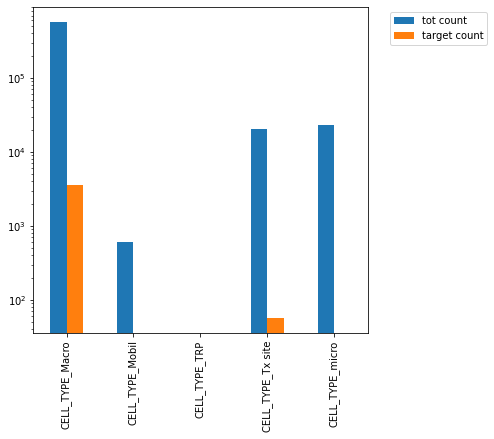

In [10]:
df_cell.plot.bar(logy=True,figsize=(6,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

In [30]:
# dropping constant column
df_train.drop('CELL_TYPE_TRP', inplace=True, axis=1)
cell_types.remove('CELL_TYPE_TRP')

In [31]:
# We want to verify how many types of cell are supported for each site. 
# The sum can be: 0 if no cell type is supported, 1 if it has one cell type, > 1 if it has more than one cell type
sub_df = df_train[cell_types]

# rows without celltype 
no_cell_df = sub_df.sum(axis=1) == 0
print("There are", no_cell_df[no_cell_df == True].shape[0], "sites without cell type")

# rows with more than one celltype 
many_cell_df = sub_df.sum(axis=1) > 1
print("There are",many_cell_df[many_cell_df == True].shape[0], "sites with more than one cell type")

There are 4500 sites without cell type
There are 0 sites with more than one cell type


In [32]:
# remove rows without celltype
df_train.drop(df_train[df_train[cell_types].sum(axis=1) == 0].index, inplace=True)

In [33]:
# Let's aggregate the CELL_TYPE attributes, by creating a unique column 
# This columns contains a value from 0 to 3 that represent the belonging cell type

dummies = pd.get_dummies(df_train[cell_types])
df_train['CELL_TYPE'] = dummies.cumsum(axis=1).ne(1).sum(axis=1)
df_train["CELL_TYPE"] = LabelEncoder().fit_transform(df_train["CELL_TYPE"])

df_train.drop(cell_types, inplace=True, axis=1)

### GEOGRAPHIC_CLUSTER

In [34]:
# Check if there are some sites that do not belong to any geogrhaphical cluster
# As a result all tuple has one unique geographic site because the num. of tuples for such that the sum of
#GEOGRAPHIC_CLUSTER_K is 1 are all the tuple 621300
geo_clusters = []
for i in range(10):
    geo_clusters.append("GEOGRAPHIC_CLUSTER_K_" + str(i))
    
sub_df = df_train[geo_clusters]
sub_df = sub_df.sum(axis=1) == 1

sub_df[sub_df == True].shape[0]

616800

In [35]:
# Here we print number of tuples with a specific belonging cluster
df_geo_total = df_train[geo_clusters].sum().to_frame(name='tot_count')
df_geo_target = df_train[df_train['aircon_sum_target_next14d'] == 1][geo_clusters].sum().to_frame(name='target_count')
df_geo = df_geo_total.join(df_geo_target)

Let's visualize the distribution of geographic clusters using a logarithmic scale

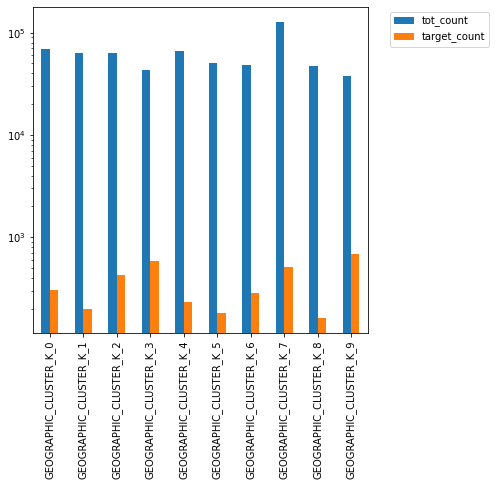

In [36]:
df_geo.plot.bar(logy=True,figsize=(6,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

In [37]:
# Let's aggregate the GEOGRAPHIC_CLUSTER attributes, by creating a unique column 
# This columns contains a value from 0 to 9 that represent the belonging cluster

df_geo = df_train[geo_clusters].groupby(
    df_train[geo_clusters].columns.str.split('_K_').str[0], axis=1).apply(
    lambda x: x.dot(x.columns.str.split('_K_').str[1])
)

In [38]:
# Add aggregated column
idx = 7
df_train.insert(loc=idx, column='GEOGRAPHIC_CLUSTER', value=df_geo)

#drop "one hot" columns
for i in range(10):
    df_train.drop('GEOGRAPHIC_CLUSTER_K_' + str(i), inplace=True, axis=1)

In [39]:
target_variable = 'aircon_sum_target_next14d'
excluded_attr = ['DATE', 'SITE_ID', 'GEOGRAPHIC_CLUSTER', 'CELL_TYPE',target_variable]
X = df_train.drop(excluded_attr,axis=1)
y = df_train[target_variable]

## Visualize variable relationship through Correlation Matrix

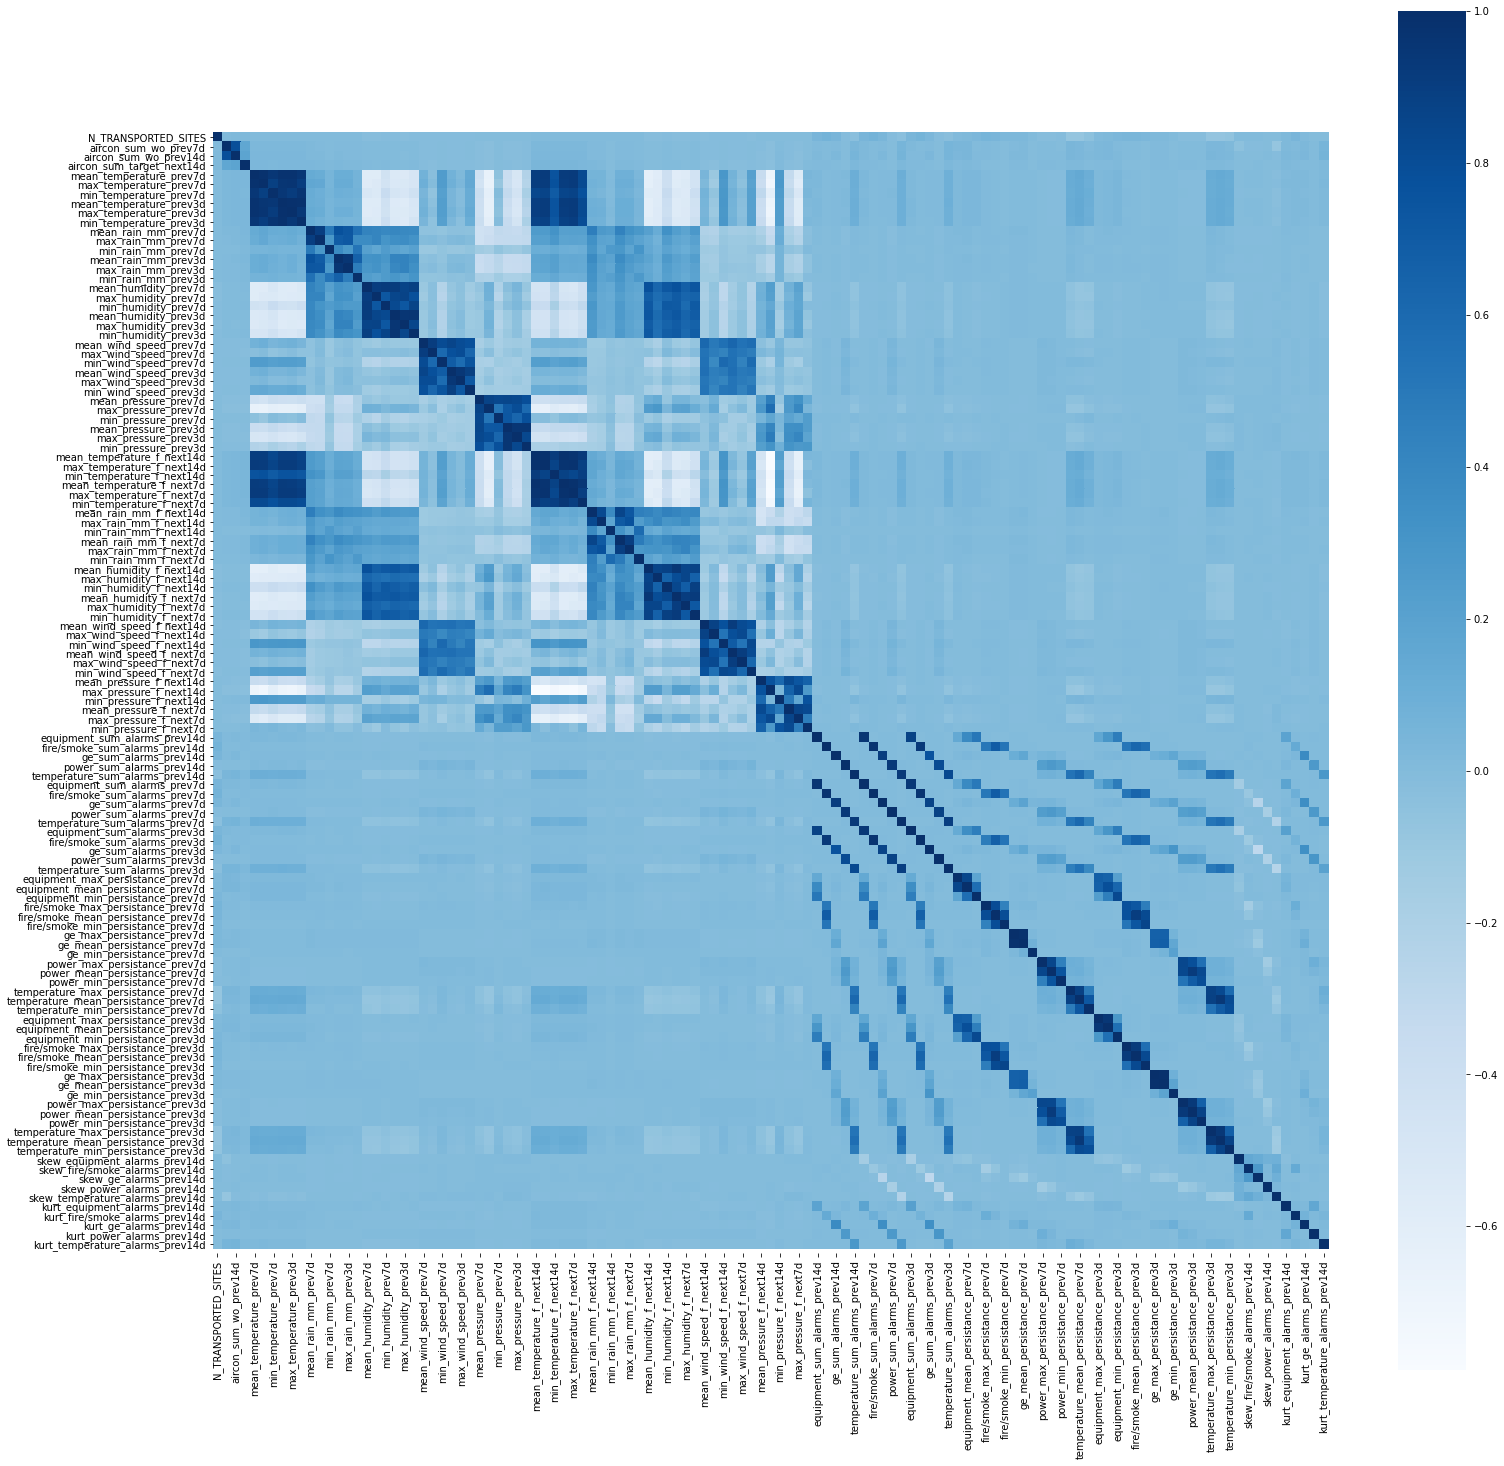

In [40]:
plt.figure(figsize=(25, 25))
cov=X.corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

This matrix is very big and quite confusing, due to the high dimensionality of the data. However it allows us to detect two submatrices, in the top left and bottom right corners. These matrices contain weather and alarms data respectively. Let's start from the latter.

## Alarms data

In [41]:
alarms_attr = X.columns[63:]
alarms_df = X[alarms_attr]

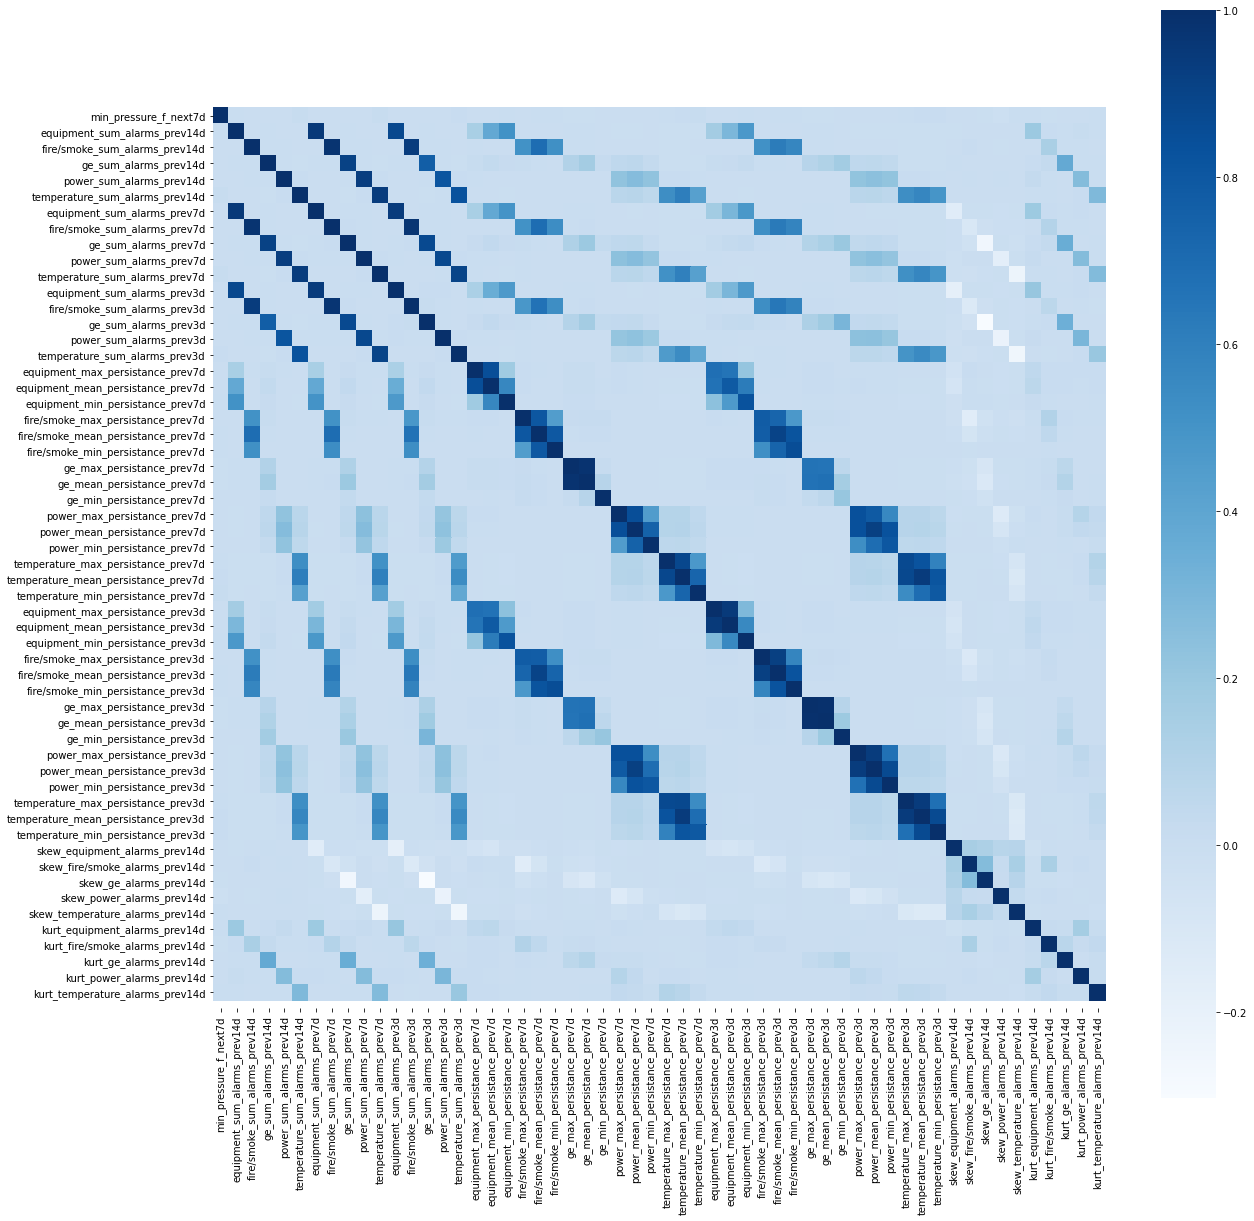

In [42]:
plt.figure(figsize=(20, 20))
cov=alarms_df.corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

From this matrix, we can notice that there is a correlation among temporal data, visualized by the two dark lines parallel to the diagonal. This is expected as the time periods are overlapping, and the 14 day period comprises the both 7 and 3 day periods.

The other dark squares underline that the statistical metrics mean, max, min are somewhat correlated with each other, as one would expect.

### *cat*_sum_alarms_prevXd

Number of alarms associated to the category *cat* observed in previous X days, where X = 3, 7, 14.


Alarms are classified in the following categories:

|Alarm category | Description  |
|---|---|
|  equipment | Alarms associated to faults on air conditioning equipments  |
| fire/smoke |  Alarms associated to the presence of fire/smoke on site |
| ge |  Alarms associated to faults on electric generator mounted on the site |
| power | Alarms associated to faults on power transmission unit  |
| temperature  | Alarms associated to problematic temperature conditions (high/low)  |


Let's visualize the correlaton between different time periods for the same category of alarm. We can notice that it follows a linear pattern for the most part.

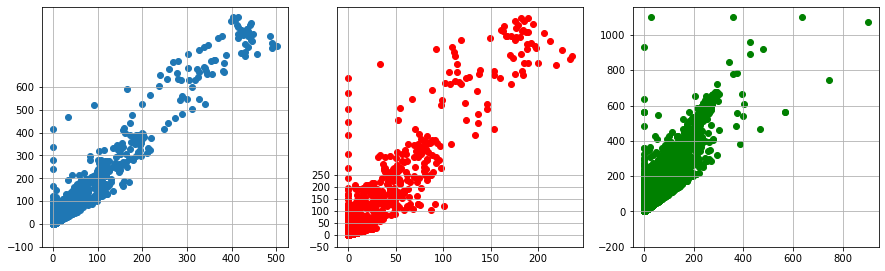

In [43]:
plt.figure(figsize = (15,15))
plt.subplot(331)
plt.scatter(X['fire/smoke_sum_alarms_prev7d'],X['fire/smoke_sum_alarms_prev14d'])
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid()
plt.subplot(332)
plt.scatter(X['fire/smoke_sum_alarms_prev3d'],X['fire/smoke_sum_alarms_prev14d'], c='r')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid()
plt.subplot(333)
plt.scatter(X['equipment_sum_alarms_prev3d'],X['equipment_sum_alarms_prev7d'], c='g')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid();

Following there are some consistency checks on the attributes.

In [44]:
# get all sum_alarms attributes
alarm_types = ['equipment', 'fire/smoke', 'ge', 'power', 'temperature']
sum_alarms = []
for d in ['14', '7', '3']:
    for a in alarm_types:
        sum_alarms.append(a + '_sum_alarms_prev'+ d +'d')

In [45]:
# check if there are negative values
(df_train[sum_alarms] < 0).values.any()

False

In [46]:
# check that for each row, sum alarms of 14d >= 7d >= 3d
for a in alarm_types:
    attr = a + '_sum_alarms_prev'
    df_shape = df_train[(df_train[attr + '14d'] < df_train[attr + '7d']) 
                        &  (df_train[attr + '7d'] <  df_train[attr + '3d'])].shape[0]
    if(df_shape != 0):
        print("Prev days data of " + a + " are inconsistent")
    else:
        print("Prev days data of " + a + " are consistent")

Prev days data of equipment are consistent
Prev days data of fire/smoke are consistent
Prev days data of ge are consistent
Prev days data of power are consistent
Prev days data of temperature are consistent


 ### *cat*_mean/max/min_persistance_prevXd
 
 Mean, max or min alarm duration (in minutes) of *cat* alarms in the previous X days, where X = 3, 7.

In [47]:
# check that for each row min7d <= min3d and max7d >= max3d
for a in alarm_types:
    max_attr = a + '_max_persistance_prev'
    min_attr = a + '_min_persistance_prev'
    
    num_inconsistent = df_train[(df_train[max_attr + '7d'] < df_train[max_attr + '3d']) 
                        & (df_train[min_attr + '7d'] >  df_train[min_attr + '3d'])].shape[0]
    if(num_inconsistent != 0):
        print("Inconsistent prev days data for " + a)
    else:
        print("Prev days data of " + a + " are consistent")

Prev days data of equipment are consistent
Prev days data of fire/smoke are consistent
Prev days data of ge are consistent
Prev days data of power are consistent
Prev days data of temperature are consistent


In [48]:
# check that for each persistance in min it is not greater than the tot available minutes
MAX_7d = 7 * 24 * 60 # minutes in 7 days
MAX_3d = 3 * 24 * 60 # minutes in 3 days

outliers7d = {}
outliers3d = {}
indexToDrop = []

for attr in df_train.columns:
    if('persistance_prev7d' in attr):
        outliers7d[attr] = df_train[attr][df_train[attr] > MAX_7d].values
        indexToDrop = np.concatenate((indexToDrop,df_train[attr][df_train[attr] > MAX_7d].index), axis=0)
    elif('persistance_prev3d' in attr): 
        outliers3d[attr] = df_train[attr][df_train[attr] > MAX_3d].values
        indexToDrop = np.concatenate((indexToDrop,df_train[attr][df_train[attr] > MAX_3d].index), axis=0)

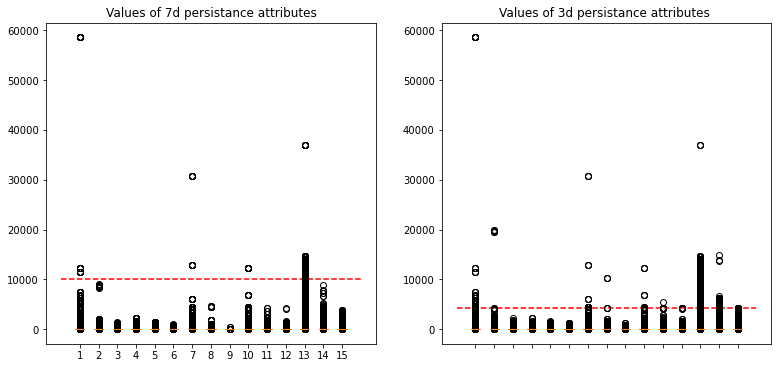

In [49]:
labels = ['']*len(outliers7d.keys())
plt.figure(figsize = (13,13))

plt.subplot(221)
plt.boxplot(df_train[list(outliers7d.keys())],labels=None)
plt.hlines(MAX_7d, 0, 16,linestyles='dashed',colors='r')
plt.title('Values of 7d persistance attributes');

plt.subplot(222)
plt.boxplot(df_train[list(outliers3d.keys())],labels=labels)
plt.hlines(MAX_3d, 0, 16,linestyles='dashed',colors='r')
plt.title('Values of 3d persistance attributes ');

Plotting the values of the persistance attributes we notice that there are a few wrong values. The red line signifies the maximum number of minutes per time period, all data points above it will be removed.

In [50]:
def outliers_Array(dic):
    values_arr = []
    for name in dic:
        values_arr = np.concatenate((values_arr, dic[name]), axis=0)
    return values_arr    

In [52]:
# We can drop the tuples containing the outlier values
df_train.drop(indexToDrop, inplace=True)

### skew_*cat*_alarms_prev14d
 
Skewness indicator of cat alarms distribution in time in the previous 14 days.

### kurt_*cat*_alarms_prev14d
 
Kurtosis indicator of cat alarms distribution in time in the previous 14 days.

## Weather data

Here we are plotting the submatrix pertaining the weather data, as we did for the alarms.

In [53]:
weather_stats = X.columns[3:63]
weather_df= X[weather_stats]

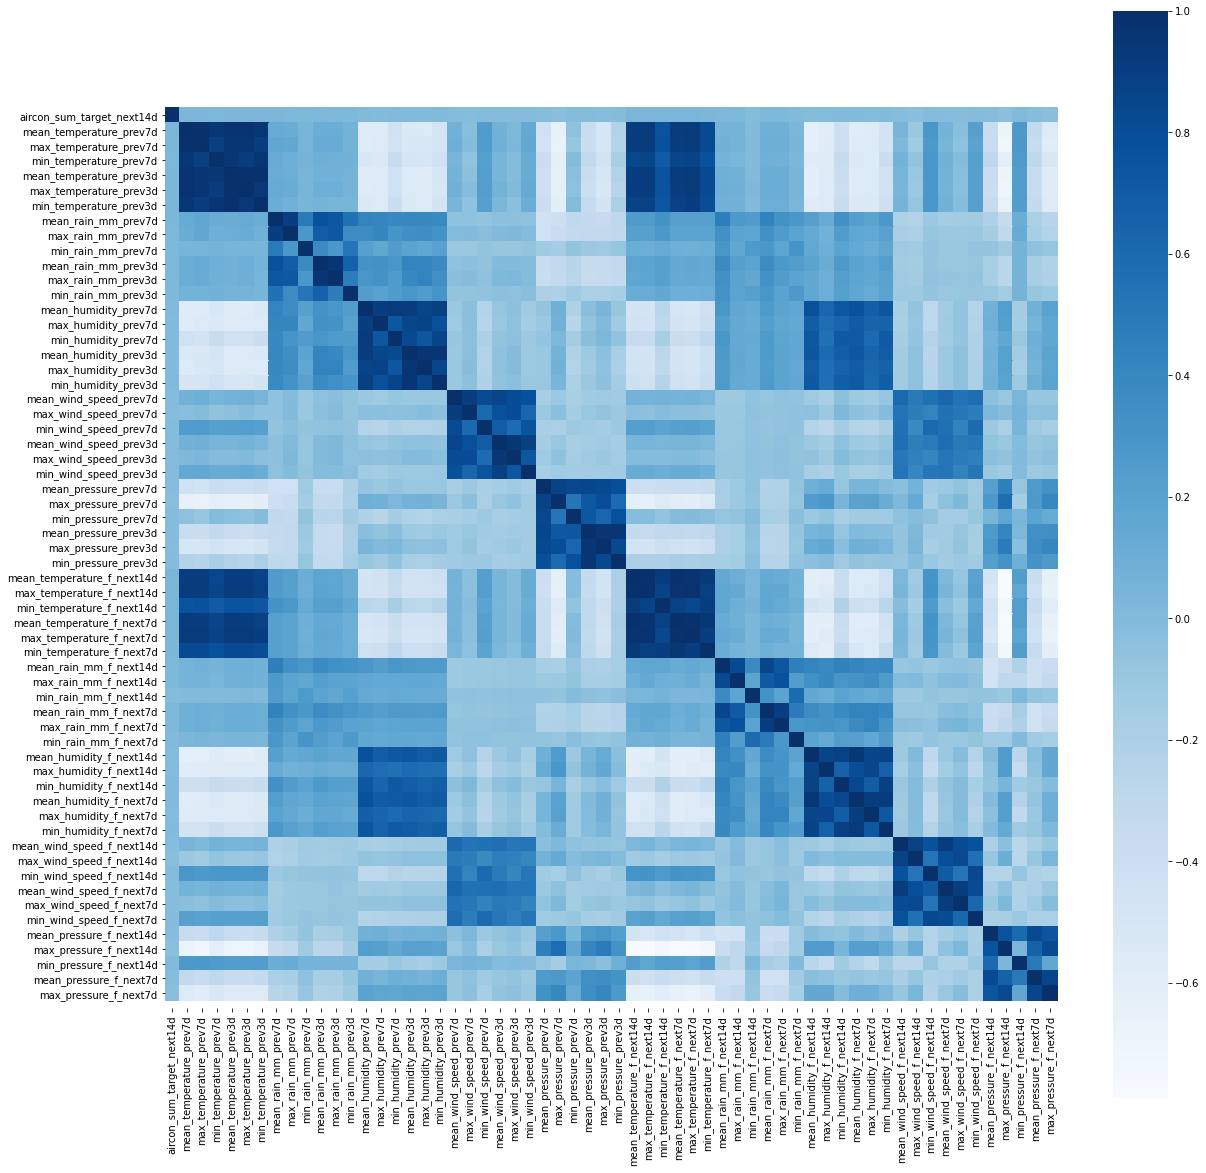

In [54]:
plt.figure(figsize=(20, 20))
cov=weather_df.corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

The dark squares along the diagonal mean that, for all weather categories except rain_mm, there is a high correlation among min, max, mean for both prev3 prev7 attributes, as well as for next_f_14 and next_f_7 attributes. 

The other two squares that stand out are the correlation among prev and next for temperature and humidity however the few drastic changes in those metrics might actually affect our target.

 ### mean/max/min_*w*_prevXd
 
 Mean, max or min of the weather condition *w* in the previous X days, where X = 3, 7.

The following are the possible weather conditions:

|Weather category | 
|---|
|  temperature |
| rain_mm | 
| humidity |
| wind_speed |
| pressure  |

Below we plotted the mean, max, min correlation for different time periods for the temperature category

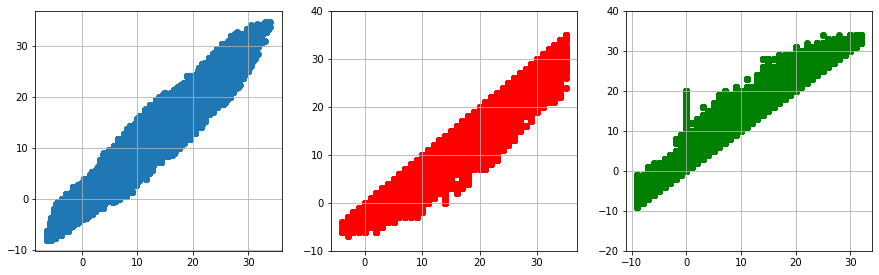

In [55]:
plt.figure(figsize = (15,15))

plt.subplot(331)
plt.scatter(X['mean_temperature_prev7d'], X['mean_temperature_prev3d'])
plt.grid()

plt.subplot(332)
plt.scatter(X['max_temperature_prev7d'], X['max_temperature_prev3d'],c='r')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid()

plt.subplot(333)
plt.scatter(X['min_temperature_prev7d'], X['min_temperature_prev3d'],c='g')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid();

As we had observed from the matrix, these attributes have a high correlation between them. These observation generalize to the other weather categories, except weather, which has a lower correlation, as shown by the scatter plots below.

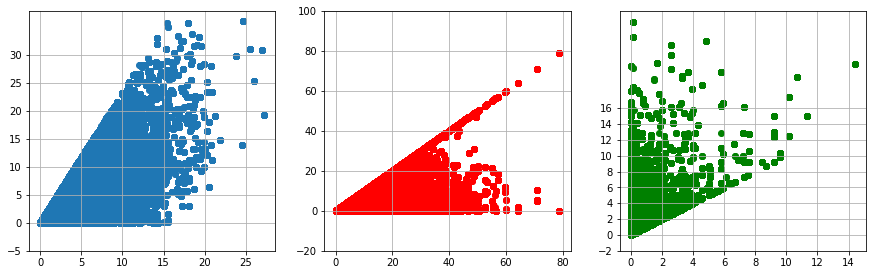

In [56]:
plt.figure(figsize = (15,15))
plt.subplot(331)
plt.scatter(X['mean_rain_mm_prev7d'], X['mean_rain_mm_prev3d'])
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid()
plt.subplot(332)
plt.scatter(X['max_rain_mm_prev7d'], X['max_rain_mm_prev3d'],c='r')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid()
plt.subplot(333)
plt.scatter(X['min_rain_mm_prev7d'], X['min_rain_mm_prev3d'],c='g')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.grid();

 ### mean/max/min_*w*\_f_nextXd
 Mean, max or min of the forecasted weather condition *w* in the following X days, where X = 7, 14.

Below we are plotting the correlation between attributes with 14 day period and the 7 day period.

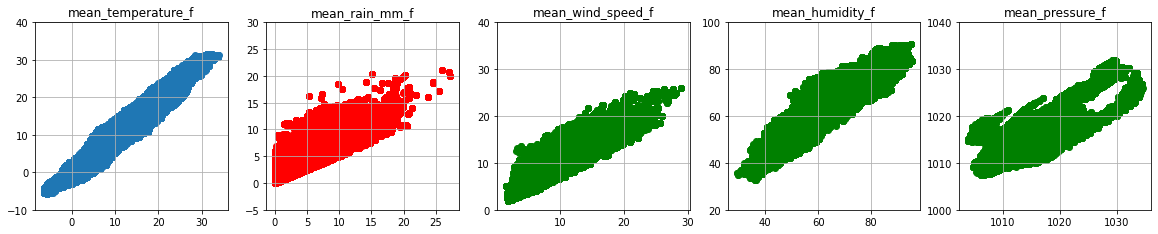

In [57]:
plt.figure(figsize = (20,20))
plt.subplot(551)
plt.scatter(X['mean_temperature_f_next7d'],X['mean_temperature_f_next14d'])
loc, labels = plt.xticks()
plt.yticks(loc)
plt.title('mean_temperature_f')
plt.grid()

plt.subplot(552)
plt.scatter(X['mean_rain_mm_f_next7d'],X['mean_rain_mm_f_next14d'], c='r')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.title('mean_rain_mm_f')
plt.grid()

plt.subplot(553)
plt.scatter(X['mean_wind_speed_f_next7d'],X['mean_wind_speed_f_next14d'], c='g')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.title('mean_wind_speed_f')
plt.grid();

plt.subplot(554)
plt.scatter(X['mean_humidity_f_next7d'],X['mean_humidity_f_next14d'], c='g')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.title('mean_humidity_f')
plt.grid();

plt.subplot(555)
plt.scatter(X['mean_pressure_f_next7d'],X['mean_pressure_f_next14d'], c='g')
loc, labels = plt.xticks()
plt.yticks(loc)
plt.title('mean_pressure_f')
plt.grid();

We see it is possible to remove all the prediction attributes for next 7 days as it highly correlated with the 14 days attributes.

## Saving the Preprocessed Data
We save the cleaned data so that we can avoid repeating the processing.

In [58]:
df_train.to_csv('data/processed_data.csv', index=False)

In [59]:
df_train

,SITE_ID,DATE,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,max_wind_speed_prev7d,min_wind_speed_prev7d,mean_wind_speed_prev3d,max_wind_speed_prev3d,min_wind_speed_prev3d,mean_pressure_prev7d,max_pressure_prev7d,min_pressure_prev7d,mean_pressure_prev3d,max_pressure_prev3d,min_pressure_prev3d,mean_temperature_f_next14d,max_temperature_f_next14d,min_temperature_f_next14d,mean_temperature_f_next7d,max_temperature_f_next7d,min_temperature_f_next7d,mean_rain_mm_f_next14d,max_rain_mm_f_next14d,min_rain_mm_f_next14d,mean_rain_mm_f_next7d,max_rain_mm_f_next7d,min_rain_mm_f_next7d,mean_humidity_f_next14d,max_humidity_f_next14d,min_humidity_f_next14d,mean_humidity_f_next7d,max_humidity_f_next7d,min_humidity_f_next7d,mean_wind_speed_f_next14d,max_wind_speed_f_next14d,min_wind_speed_f_next14d,mean_wind_speed_f_next7d,max_wind_speed_f_next7d,min_wind_speed_f_next7d,mean_pressure_f_next14d,max_pressure_f_next14d,min_pressure_f_next14d,mean_pressure_f_next7d,max_pressure_f_next7d,min_pressure_f_next7d,equipment_sum_alarms_prev14d,fire/smoke_sum_alarms_prev14d,ge_sum_alarms_prev14d,power_sum_alarms_prev14d,temperature_sum_alarms_prev14d,equipment_sum_alarms_prev7d,fire/smoke_sum_alarms_prev7d,ge_sum_alarms_prev7d,power_sum_alarms_prev7d,temperature_sum_alarms_prev7d,equipment_sum_alarms_prev3d,fire/smoke_sum_alarms_prev3d,ge_sum_alarms_prev3d,power_sum_alarms_prev3d,temperature_sum_alarms_prev3d,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d,CELL_TYPE
0,146,2019-04-10,3.0,8,0.0,0.0,0,10.29,14.0,6.0,12.00,14.0,9.0,1.33,8.5,0.0,3.10,8.5,0.3,62.71,81.0,45.0,70.67,81.0,58.0,11.43,16.0,5.0,8.00,12.0,5.0,1013.00,1022.0,1006.0,1008.00,1010.0,1006.0,8.00,12.0,5.0,6.14,9.0,5.0,4.79,19.6,0.1,6.41,19.6,0.2,74.29,89.0,58.0,80.00,89.0,63.0,12.86,17.0,5.0,13.86,17.0,10.0,1020.71,1028.0,1009.0,1016.14,1020.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,0
1,146,2019-04-11,3.0,8,0.0,0.0,0,11.71,16.0,9.0,13.00,16.0,9.0,1.90,8.5,0.0,4.27,8.5,0.3,66.43,81.0,51.0,75.00,81.0,71.0,11.57,16.0,5.0,8.00,12.0,5.0,1010.86,1017.0,1006.0,1007.00,1008.0,1006.0,8.50,16.0,5.0,5.86,8.0,5.0,3.52,12.5,0.1,4.63,12.5,0.2,72.93,89.0,58.0,79.86,89.0,63.0